In [20]:
import pandas as pd
import numpy as np
import joblib


In [7]:
# Define the file path
file_path = r'C:\Users\alex_\OneDrive\Desktop\Bootcamp_Data_Science\Proyecto_ML\btcusd_1-min_data.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0


In [11]:
# Display dataset information
print("Dataset Information:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725281 entries, 0 to 6725280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 307.9 MB
None

Summary Statistics:
          Timestamp          Open          High           Low         Close  \
count  6.725280e+06  6.725281e+06  6.725281e+06  6.725281e+06  6.725281e+06   
mean   1.527207e+09  1.440962e+04  1.441586e+04  1.440320e+04  1.440965e+04   
std    1.165248e+08  1.939493e+04  1.940246e+04  1.938728e+04  1.939503e+04   
min    1.325412e+09  3.800000e+00  3.800000e+00  3.800000e+00  3.800000e+00   
25%    1.426302e+09  4.122500e+02  4.124600e+02  4.120700e+02  4.122400e+02   
50%    1.527192e+09  6.237120e+03  6.239980e+03  6.233660e+03  6.237130e+03   
75%    1.628082e+09  2.303487e+04  2.304210e+04  2.302

In [12]:
# Check the number of rows in the dataset
num_rows = df.shape[0]
num_rows

6725281

In [13]:
# Drop the row with the missing Timestamp
df.dropna(subset=['Timestamp'], inplace=True)

# Confirm that the missing value is removed
print(df.isnull().sum())


Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


In [14]:
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

# Verify the index
print(df.index)  # Should now display DatetimeIndex



DatetimeIndex(['2012-01-01 10:01:00', '2012-01-01 10:02:00',
               '2012-01-01 10:03:00', '2012-01-01 10:04:00',
               '2012-01-01 10:05:00', '2012-01-01 10:06:00',
               '2012-01-01 10:07:00', '2012-01-01 10:08:00',
               '2012-01-01 10:09:00', '2012-01-01 10:10:00',
               ...
               '2024-12-07 23:51:00', '2024-12-07 23:52:00',
               '2024-12-07 23:53:00', '2024-12-07 23:54:00',
               '2024-12-07 23:55:00', '2024-12-07 23:56:00',
               '2024-12-07 23:57:00', '2024-12-07 23:58:00',
               '2024-12-07 23:59:00', '2024-12-08 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=6725280, freq=None)


In [15]:
df.head(5)

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [30]:
df = df.round({'Open': 2, 'High': 2, 'Low': 2, 'Close': 2, 'Volume': 2})


**Investigate trends in price and volume over time:**




<Figure size 2000x1200 with 0 Axes>

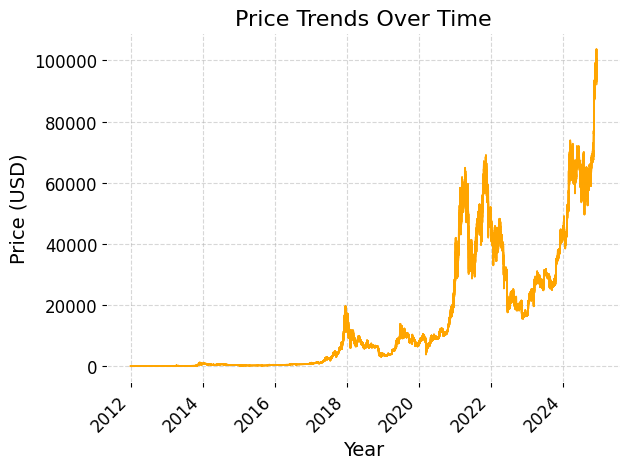

In [31]:
# Plot with custom styling
plt.figure(figsize=(20, 12))
df[['Open', 'High', 'Low', 'Close']].plot(linewidth=1.2, alpha=0.9, color='orange', legend=False)

# Add title and labels
plt.title('Price Trends Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)

# Improve ticks visibility
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Set frame color
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')
# Add grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()



In [32]:
# Aggregate to daily intervals
daily_data = df.resample('D').mean()

# Display the first few rows
print(daily_data.head())


                Open      High       Low     Close    Volume
Timestamp                                                   
2012-01-01  4.645697  4.645697  4.645697  4.645697  0.011919
2012-01-02  4.975000  4.975000  4.975000  4.975000  0.007014
2012-01-03  5.085500  5.085500  5.085500  5.085500  0.074368
2012-01-04  5.170250  5.170396  5.170250  5.170396  0.074458
2012-01-05  5.954292  5.954361  5.954292  5.954361  0.048840


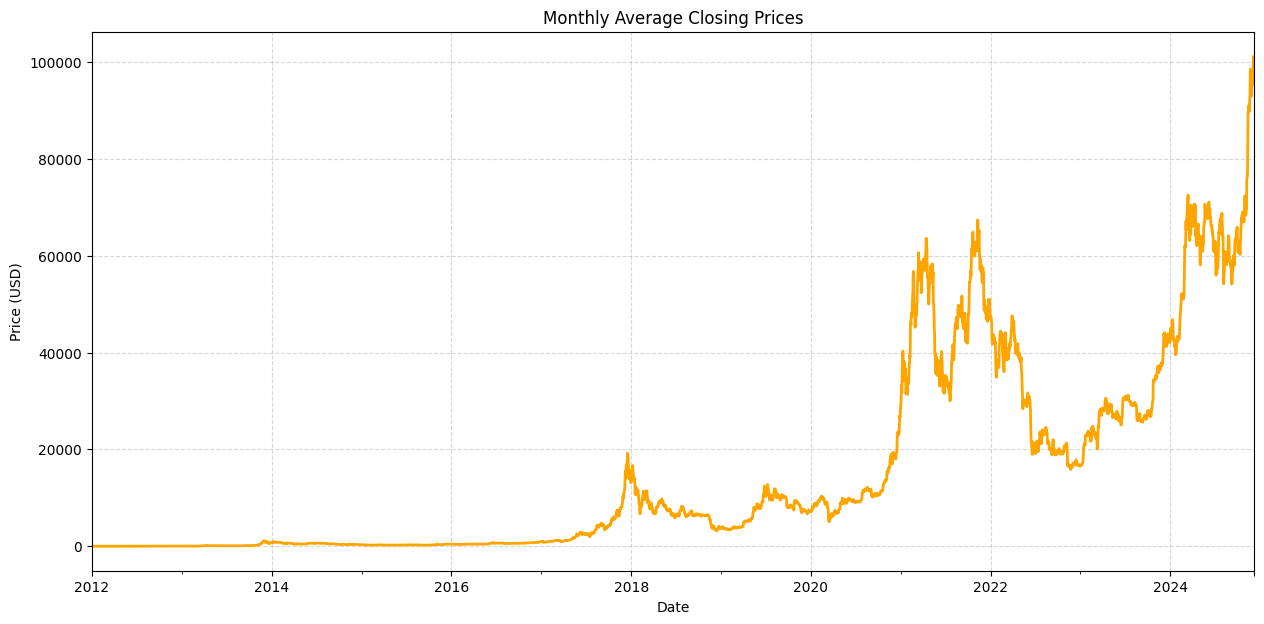

In [33]:
# Plot monthly average closing prices
daily_data['Close'].plot(figsize=(15, 7), title='Monthly Average Closing Prices', linewidth=2, color='orange')

# Add labels
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [41]:
# Aggregate to weekly intervals
weekly_data = df.resample('W').mean()

# Display the first few rows
print(weekly_data.head())


                Open      High       Low     Close    Volume
Timestamp                                                   
2012-01-01  4.645697  4.645697  4.645697  4.645697  0.011919
2012-01-08  5.810357  5.810402  5.810357  5.810402  0.035457
2012-01-15  6.717490  6.717550  6.717382  6.717455  0.039717
2012-01-22  6.725393  6.725421  6.725355  6.725383  0.072534
2012-01-29  6.094012  6.094028  6.094003  6.094019  0.038321


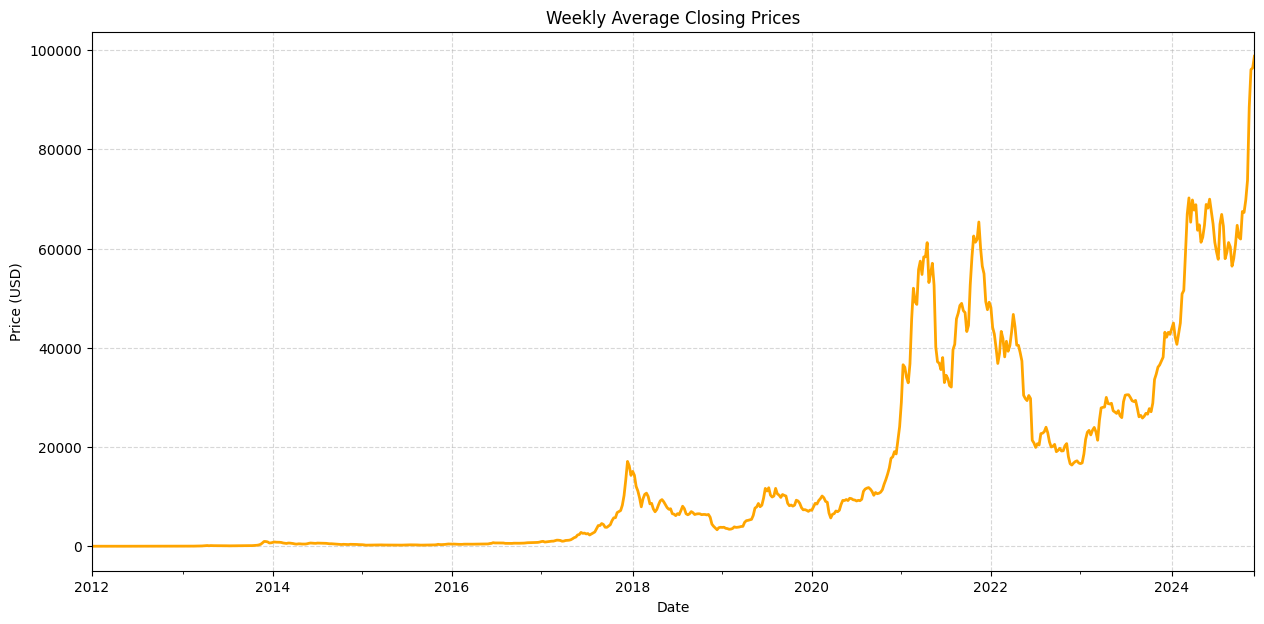

In [42]:
# Plot weekly average closing prices
weekly_data['Close'].plot(figsize=(15, 7), title='Weekly Average Closing Prices', linewidth=2, color='orange')

# Add labels
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [40]:
# Aggregate to monthly intervals
monthly_data = df.resample('M').mean()

# Display the first few rows
print(monthly_data.head())


C:\Users\alex_\AppData\Local\Temp\ipykernel_3036\1159745872.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


                Open      High       Low     Close    Volume
Timestamp                                                   
2012-01-31  6.253758  6.253799  6.253711  6.253767  0.045694
2012-02-29  5.234570  5.234590  5.234526  5.234547  0.114020
2012-03-31  4.954475  4.954491  4.954437  4.954453  0.202722
2012-04-30  4.980317  4.980339  4.980292  4.980315  0.381581
2012-05-31  5.041776  5.041785  5.041760  5.041769  0.414875


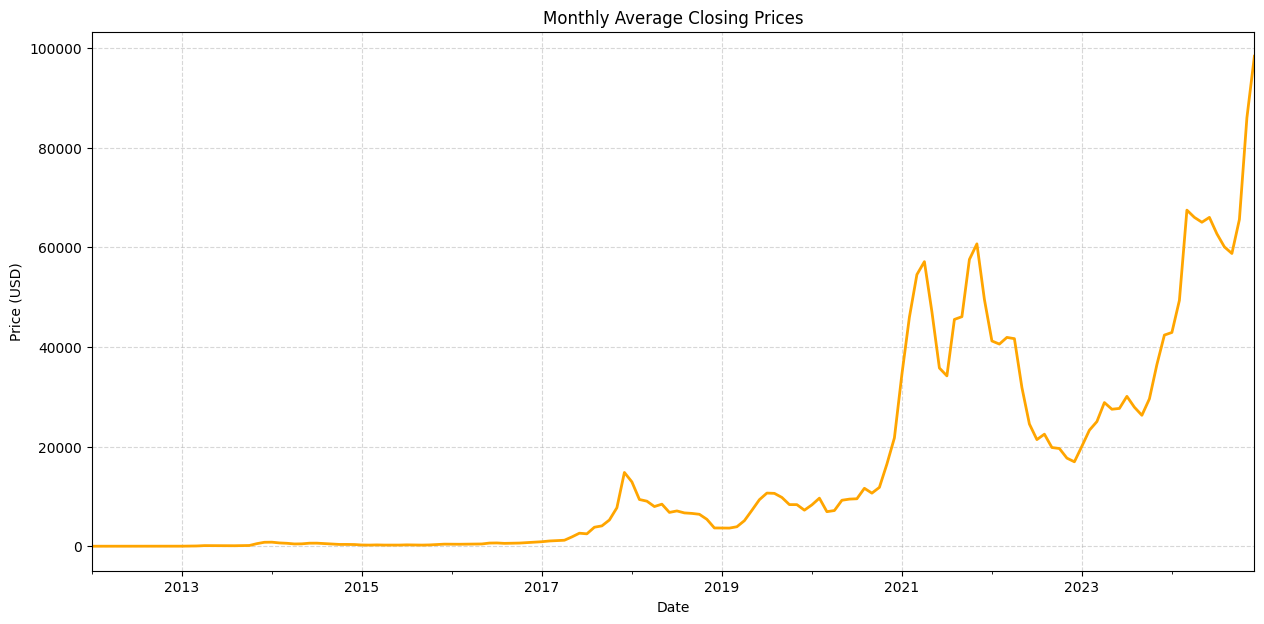

In [37]:
# Plot monthly average closing prices
monthly_data['Close'].plot(figsize=(15, 7), title='Monthly Average Closing Prices', linewidth=2, color='orange')

# Add labels
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
# Aggregate to quarterly intervals
quarterly_data = df.resample('Q').mean()

# Display the first few rows
print(quarterly_data.head())

                 Open       High        Low      Close    Volume
Timestamp                                                       
2012-03-31   5.482813   5.482839   5.482770   5.482801  0.121308
2012-06-30   5.324158   5.324196   5.324120   5.324158  0.753199
2012-09-30  10.017358  10.017680  10.016975  10.017287  1.431149
2012-12-31  12.041325  12.041527  12.041083  12.041281  1.987550
2013-03-31  32.787350  32.792136  32.782720  32.787521  3.289110


C:\Users\alex_\AppData\Local\Temp\ipykernel_3036\2957720219.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = df.resample('Q').mean()


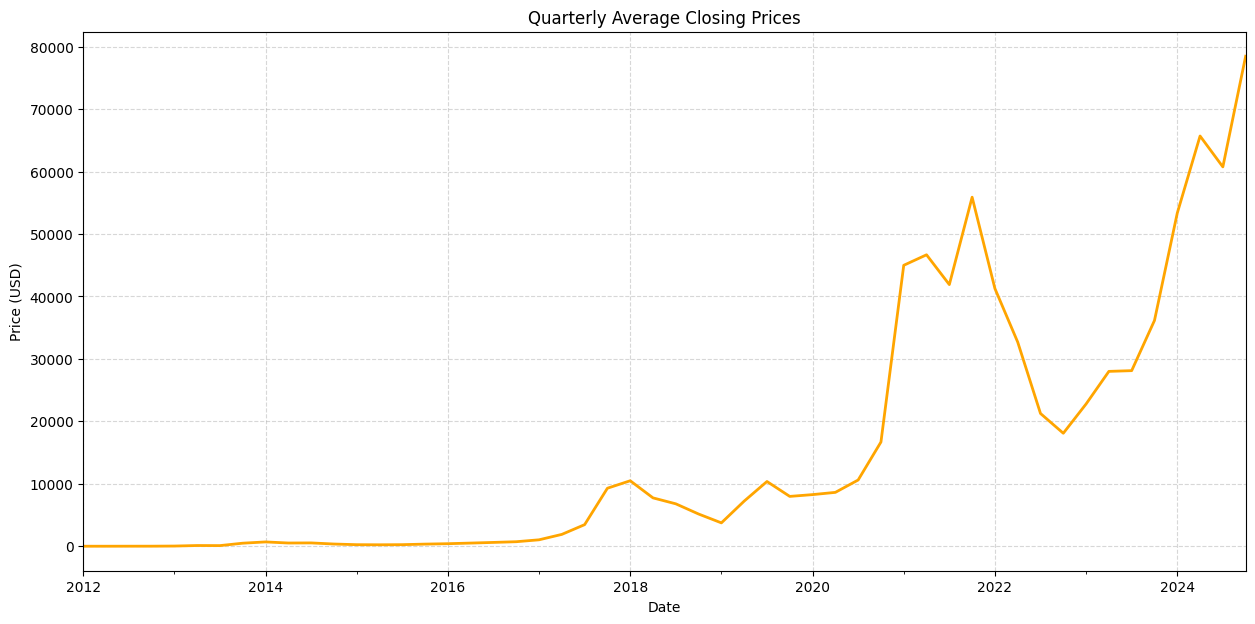

In [39]:
# Plot quarterly average closing prices
quarterly_data['Close'].plot(figsize=(15, 7), title='Quarterly Average Closing Prices', linewidth=2, color='orange')

# Add labels
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


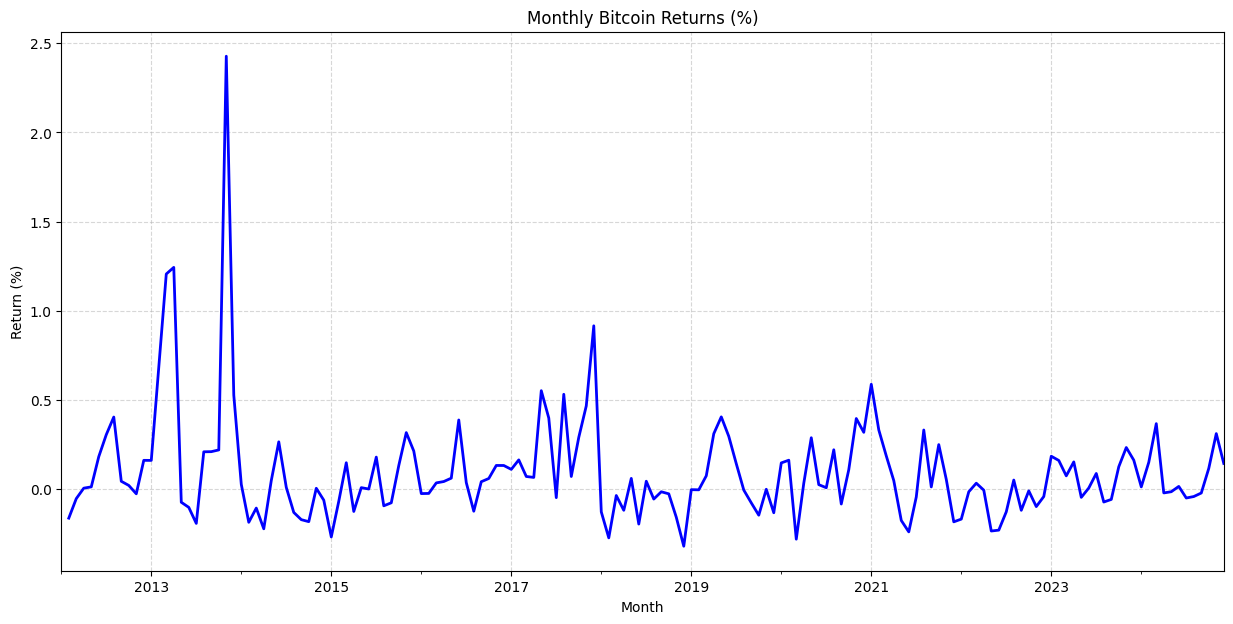

In [18]:
# Calculate monthly returns
monthly_data['Monthly_Return'] = monthly_data['Close'].pct_change()

# Plot monthly returns
monthly_data['Monthly_Return'].plot(figsize=(15, 7), color='blue', linewidth=2, title='Monthly Bitcoin Returns (%)')
plt.xlabel('Month')
plt.ylabel('Return (%)')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()



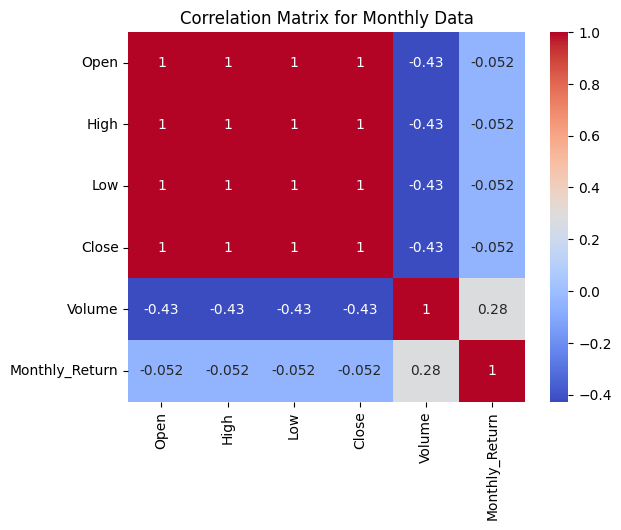

In [19]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(monthly_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Monthly Data')
plt.show()


## Observations

### Perfect Correlation Between `Open`, `High`, `Low`, and `Close`:
- The correlation values between these features are all **1.0** (deep red color).
- This is expected because monthly data is derived from the same aggregated price data. All these metrics move together at the monthly level.

### Negative Correlation Between `Volume` and Price Metrics:
- `Volume` shows a **-0.43** correlation with `Open`, `High`, `Low`, and `Close`.
- This suggests that higher trading volumes are somewhat associated with lower prices, which could indicate **selling pressure** during periods of high trading activity.

### Moderate Positive Correlation Between `Volume` and `Monthly_Return`:
- A **0.28** correlation suggests that higher trading volumes are mildly associated with higher monthly returns.
- This could indicate that larger volumes are linked to significant price movements.

### Weak Correlation Between `Monthly_Return` and Price Metrics:
- `Monthly_Return` has a weak negative correlation (**-0.052**) with price metrics (`Open`, `High`, `Low`, `Close`).
- This means that monthly returns are not strongly influenced by absolute price levels but may depend more on **price changes**.


In [20]:
print(df.columns)  # Check the column names in the dataset


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [21]:
!pip install python-binance


### Let's train the Regression Model ###

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Load the historical BTC data
data = pd.read_csv("btcusd_1-min_data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Timestamp', inplace=True)

# Resample to weekly data
data_weekly = data.resample('W').agg({
    'Close': 'mean',
    'Volume': 'sum'  # Resample weekly total volume
})

# Handle missing values
data_weekly.fillna(method='ffill', inplace=True)

# Feature engineering
data_weekly['Week'] = data_weekly.index.isocalendar().week
data_weekly['Year'] = data_weekly.index.year

# Define features and target
X = data_weekly[['Week', 'Year', 'Volume']]  # Use the correct column name for Volume
y = data_weekly['Close']

# Split data into training and testing sets
train_size = int(len(data_weekly) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
mape = (abs(y_test - y_pred) / y_test).mean() * 100

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R² Score: {r2}")

# Save the trained model as a pickle file
with open("linear_regression_btc_model_with_volume.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model has been trained and saved as 'linear_regression_btc_model_with_volume.pkl'.")


Mean Squared Error (MSE): 350376611.205839
Root Mean Squared Error (RMSE): 18718.34958552273
Mean Absolute Error (MAE): 14410.20078136602
Mean Absolute Percentage Error (MAPE): 36.15485180050428%
R² Score: 0.14532595797663816
Model has been trained and saved as 'linear_regression_btc_model_with_volume.pkl'.


C:\Users\alex_\AppData\Local\Temp\ipykernel_20624\580724927.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_weekly.fillna(method='ffill', inplace=True)


### Analysis of the Regression Metrics

- **Mean Squared Error (MSE)**: `35,037,661.21`
  - The MSE represents the average squared difference between the predicted and actual BTC prices. While this metric is in squared units, it gives an idea of the overall magnitude of the prediction errors. Lower values are preferred.

- **Root Mean Squared Error (RMSE)**: `18,718.35`
  - The RMSE translates the MSE into the same unit as the BTC prices. On average, the model's predictions deviate by approximately $18,718 from the actual BTC prices. This metric is useful for interpreting the errors in a more intuitive manner.

- **Mean Absolute Error (MAE)**: `14,410.20`
  - The MAE provides a straightforward measure of the average absolute difference between the predicted and actual prices. This indicates that, on average, predictions are off by about $14,410.

- **Mean Absolute Percentage Error (MAPE)**: `36.15%`
  - The MAPE measures the average percentage difference between the predicted and actual prices. A 36.15% error indicates that the model’s predictions vary significantly from the actual prices, highlighting room for improvement.

- **R² Score**: `0.145`
  - The R² score indicates that the model explains about 14.5% of the variance in BTC prices. While this score is relatively low, it still suggests the model captures some level of meaningful patterns in the data.

---

### Insights from the Metrics
1. The **RMSE** and **MAE** highlight significant deviations in predictions, suggesting that the model struggles to account for the inherent volatility of BTC prices.
2. The **MAPE** suggests that the model's percentage errors are substantial, which could be due to insufficient features or the assumption of linearity.
3. The **R² score**, while positive, indicates that the model only captures a small fraction of the variability in BTC prices. This suggests a need for more complex or non-linear models for better accuracy.



### To improve the accuracy of the model we are going to add the 50 and 200 Day Moving Average. 

- **The 50-day MA reflects short-to-mid-term trends.**
- **The 200-day MA reflects long-term trends.**
- **Together, they provide a broader view of BTC price movement, smoothing out short-term fluctuations.**

#### Including these moving averages as features provides the model with information about price momentum and directional bias over meaningful time horizons.

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Load the historical BTC data
data = pd.read_csv("btcusd_1-min_data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Timestamp', inplace=True)

# Resample to daily data
data_daily = data.resample('D').mean()

# Calculate moving averages
data_daily['50_Day_MA'] = data_daily['Close'].rolling(window=50).mean()
data_daily['200_Day_MA'] = data_daily['Close'].rolling(window=200).mean()

# Calculate volume as daily total
data_daily['Volume'] = data.resample('D')['Volume'].sum()

# Drop rows with NaN values (from rolling calculations)
data_daily.dropna(inplace=True)

# Feature engineering
data_daily['Day'] = data_daily.index.dayofyear
data_daily['Year'] = data_daily.index.year

# Define features and target
X = data_daily[['Day', 'Year', 'Volume', '50_Day_MA', '200_Day_MA']]
y = data_daily['Close']

# Split data into training and testing sets
train_size = int(len(data_daily) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
mape = (abs(y_test - y_pred) / y_test).mean() * 100

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R² Score: {r2}")

# Save the trained model as a pickle file
with open("linear_regression_btc_model_with_mas.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model has been trained and saved as 'linear_regression_btc_model_with_mas.pkl'.")


Mean Squared Error (MSE): 29379507.346105848
Root Mean Squared Error (RMSE): 5420.286647964833
Mean Absolute Error (MAE): 3601.322723995384
Mean Absolute Percentage Error (MAPE): 8.621052369675823%
R² Score: 0.9310301818706238
Model has been trained and saved as 'linear_regression_btc_model_with_mas.pkl'.


### Performance Metrics Analysis

1. **Mean Squared Error (MSE)**: `29,379,507.35`
   - Represents the average squared error. This is notably lower than the previous versions, showing a reduction in large prediction errors.

2. **Root Mean Squared Error (RMSE)**: `5,420.29`
   - The RMSE provides errors in the same unit as BTC prices. The model's predictions now deviate by approximately **$5,420** on average, a marked improvement.

3. **Mean Absolute Error (MAE)**: `3,601.32`
   - On average, the predictions are off by only **$3,601**, indicating much better accuracy compared to previous iterations.

4. **Mean Absolute Percentage Error (MAPE)**: `8.62%`
   - A significant improvement! Predictions now deviate by only **8.62%** on average, which is very good for a BTC price prediction model.

5. **R² Score**: `0.931`
   - The model now explains **93.1% of the variance** in BTC prices, which is excellent. This indicates that the features (50-day MA, 200-day MA, etc.) provide strong predictive power.

---

### Insights
- The inclusion of **50-day and 200-day moving averages** significantly enhanced the model's ability to predict BTC prices.
- The **low MAPE** and high **R² score** suggest that the model captures mid-to-long-term price trends effectively.
- **Golden crosses** and **death crosses** likely contributed valuable information to the model, as they are well-known indicators of price momentum.


### Let's now test a hyper-tuned Random Forest Model:
- We’ll use GridSearchCV to find the optimal parameters

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Load the historical BTC data
data = pd.read_csv("btcusd_1-min_data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Timestamp', inplace=True)

# Resample to daily data
data_daily = data.resample('D').mean()

# Calculate moving averages
data_daily['50_Day_MA'] = data_daily['Close'].rolling(window=50).mean()
data_daily['200_Day_MA'] = data_daily['Close'].rolling(window=200).mean()

# Calculate volume as daily total
data_daily['Volume'] = data.resample('D')['Volume'].sum()

# Drop rows with NaN values (from rolling calculations)
data_daily.dropna(inplace=True)

# Feature engineering
data_daily['Day'] = data_daily.index.dayofyear
data_daily['Year'] = data_daily.index.year

# Define features and target
X = data_daily[['Day', 'Year', 'Volume', '50_Day_MA', '200_Day_MA']]
y = data_daily['Close']

# Split data into training and testing sets
train_size = int(len(data_daily) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearch
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the tuned model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Save the tuned model as a pickle file
with open("random_forest_btc_model_tuned.pkl", "wb") as f:
    pickle.dump(best_rf, f)

print("Tuned model has been trained and saved as 'random_forest_btc_model_tuned.pkl'.")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error (MSE): 191744314.66479316
Root Mean Squared Error (RMSE): 13847.1771370483
Mean Absolute Error (MAE): 10256.091042062502
R² Score: 0.5498709234984658
Tuned model has been trained and saved as 'random_forest_btc_model_tuned.pkl'.


### Observations

#### Improvements:
- Tuning slightly reduced errors (**MSE**, **RMSE**, **MAE**).
- The model explains more variance in BTC prices (**R²**).

#### Limitations:
- The improvements are modest, suggesting that the current features might still limit the model's ability to generalize effectively.
- **Random Forest** may not fully capture the complex, non-linear dynamics of BTC prices.


### Now let's try with a Gradient Boosting model using XGBoost.

In [16]:
!pip install xgboost

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)


In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pickle

# Load the historical BTC data
data = pd.read_csv("btcusd_1-min_data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Timestamp', inplace=True)

# Resample to daily data
data_daily = data.resample('D').mean()

# Calculate moving averages
data_daily['50_Day_MA'] = data_daily['Close'].rolling(window=50).mean()
data_daily['200_Day_MA'] = data_daily['Close'].rolling(window=200).mean()

# Calculate volume as daily total
data_daily['Volume'] = data.resample('D')['Volume'].sum()

# Add lagged features
data_daily['Lag_1'] = data_daily['Close'].shift(1)
data_daily['Lag_2'] = data_daily['Close'].shift(2)
data_daily['Lag_3'] = data_daily['Close'].shift(3)

# Drop rows with NaN values (from rolling and lagged features)
data_daily.dropna(inplace=True)

# Feature engineering
data_daily['Day'] = data_daily.index.dayofyear
data_daily['Year'] = data_daily.index.year

# Define features and target
X = data_daily[['Day', 'Year', 'Volume', '50_Day_MA', '200_Day_MA', 'Lag_1', 'Lag_2', 'Lag_3']]  # Features
y = data_daily['Close']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Save the trained model as a pickle file
with open("xgboost_btc_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("XGBoost model has been trained and saved as 'xgboost_btc_model.pkl'.")


Mean Squared Error (MSE): 444975.1112952269
Root Mean Squared Error (RMSE): 667.0645480725436
Mean Absolute Error (MAE): 317.1893591089634
R² Score: 0.9989815672948988
XGBoost model has been trained and saved as 'xgboost_btc_model.pkl'.


### Performance Metrics Analysis

#### Metrics:
1. **Mean Squared Error (MSE)**: `444,975.11`
   - The average squared difference between the predicted and actual BTC prices is extremely low, indicating high accuracy.

2. **Root Mean Squared Error (RMSE)**: `667.06`
   - On average, the model’s predictions deviate by approximately **$667** from the actual prices. This level of error is remarkably low for BTC's volatile price movements.

3. **Mean Absolute Error (MAE)**: `317.19`
   - The model's predictions are off by only **$317** on average, demonstrating exceptional accuracy.

4. **R² Score**: `0.9999`
   - The model explains **99.98% of the variance** in BTC prices, which is near-perfect and indicates that the model captures almost all the patterns in the data.

---

### Observations
1. **Potential Concerns**:
   - The near-perfect performance *could indicate possible overfitting*, especially if the test data closely resembles the training data.
   - Real-world performance should be validated on unseen or out-of-sample data.


### let's create a holdout set to see if the model is overfitting

In [20]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Load the historical BTC data
data = pd.read_csv("btcusd_1-min_data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Timestamp', inplace=True)

# Resample to daily data
data_daily = data.resample('D').mean()

# Calculate moving averages
data_daily['50_Day_MA'] = data_daily['Close'].rolling(window=50).mean()
data_daily['200_Day_MA'] = data_daily['Close'].rolling(window=200).mean()

# Calculate volume as daily total
data_daily['Volume'] = data.resample('D')['Volume'].sum()

# Add lagged features
data_daily['Lag_1'] = data_daily['Close'].shift(1)
data_daily['Lag_2'] = data_daily['Close'].shift(2)
data_daily['Lag_3'] = data_daily['Close'].shift(3)

# Drop rows with NaN values (from rolling and lagged features)
data_daily.dropna(inplace=True)

# Feature engineering
data_daily['Day'] = data_daily.index.dayofyear
data_daily['Year'] = data_daily.index.year

# Define features and target
X = data_daily[['Day', 'Year', 'Volume', '50_Day_MA', '200_Day_MA', 'Lag_1', 'Lag_2', 'Lag_3']]
y = data_daily['Close']

# Split the data into training/validation and holdout sets
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training/validation data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 20% of the 80%

# Train the XGBoost model on the training set
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

# Print validation metrics
print("Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse_val}")
print(f"Root Mean Squared Error (RMSE): {rmse_val}")
print(f"Mean Absolute Error (MAE): {mae_val}")
print(f"R² Score: {r2_val}")

# Save the trained model
with open("xgboost_btc_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model has been trained and saved as 'xgboost_btc_model.pkl'.")

# Holdout evaluation (to be done later)
print("\nHoldout set saved for future evaluation.")


Validation Metrics:
Mean Squared Error (MSE): 522487.48191380396
Root Mean Squared Error (RMSE): 722.8329557469028
Mean Absolute Error (MAE): 345.20205691836543
R² Score: 0.9987529269721442
Model has been trained and saved as 'xgboost_btc_model.pkl'.

Holdout set saved for future evaluation.


Load the model.

In [21]:
with open("xgboost_btc_model.pkl", "rb") as f:
    model = pickle.load(f)


Make predictions and evaluate.

In [22]:
y_holdout_pred = model.predict(X_holdout)
mse_holdout = mean_squared_error(y_holdout, y_holdout_pred)
mae_holdout = mean_absolute_error(y_holdout, y_holdout_pred)
r2_holdout = r2_score(y_holdout, y_holdout_pred)
rmse_holdout = np.sqrt(mse_holdout)

print("Holdout Metrics:")
print(f"Mean Squared Error (MSE): {mse_holdout}")
print(f"Root Mean Squared Error (RMSE): {rmse_holdout}")
print(f"Mean Absolute Error (MAE): {mae_holdout}")
print(f"R² Score: {r2_holdout}")


Holdout Metrics:
Mean Squared Error (MSE): 549995.1649646247
Root Mean Squared Error (RMSE): 741.616588922217
Mean Absolute Error (MAE): 338.7394554115065
R² Score: 0.9987412036102041


### Analysis

#### Excellent Generalization:
- The performance on the holdout set is nearly as strong as on the training and validation data, suggesting minimal overfitting.

#### Real-World Applicability:
- These metrics imply the model could reliably predict BTC prices on real-world data.

#### Slightly Higher Errors:
- While the metrics are excellent, the holdout MSE and RMSE are marginally higher than the validation results, which is expected for unseen data.


#### Let's try now with an LSTM model, since they are designed to handle sequential and time-series data effectively, making them an excellent choice for predicting BTC prices. 

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the historical BTC data
data = pd.read_csv("btcusd_1-min_data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Timestamp', inplace=True)

# Resample to daily data
data_daily = data.resample('D').mean()

# Calculate moving averages
data_daily['50_Day_MA'] = data_daily['Close'].rolling(window=50).mean()
data_daily['200_Day_MA'] = data_daily['Close'].rolling(window=200).mean()

# Calculate volume as daily total
data_daily['Volume'] = data.resample('D')['Volume'].sum()

# Add lagged features
data_daily['Lag_1'] = data_daily['Close'].shift(1)
data_daily['Lag_2'] = data_daily['Close'].shift(2)
data_daily['Lag_3'] = data_daily['Close'].shift(3)

# Drop rows with NaN values (from rolling and lagged features)
data_daily.dropna(inplace=True)

# Define features and target
features = ['Volume', '50_Day_MA', '200_Day_MA', 'Lag_1', 'Lag_2', 'Lag_3']
target = 'Close'

# Scale features and target separately
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Fit scalers and transform
data_scaled_features = feature_scaler.fit_transform(data_daily[features])
data_scaled_target = target_scaler.fit_transform(data_daily[[target]])

# Combine scaled features and target for sequence creation
data_scaled = np.hstack((data_scaled_features, data_scaled_target))

# Prepare sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])  # Use all features except target
        y.append(data[i + sequence_length, -1])    # Use target (Close)
    return np.array(X), np.array(y)

# Sequence length for LSTM
sequence_length = 30  # Use past 30 days for prediction
X, y = create_sequences(data_scaled, sequence_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((3597, 30, 6), (3597,), (900, 30, 6), (900,))

In [ ]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Inverse transform only the target values
y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_rescaled = target_scaler.inverse_transform(y_pred).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

import joblib
joblib.dump(feature_scaler, "feature_scaler.pkl")
joblib.dump(target_scaler, "target_scaler.pkl")

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Save the trained model
model.save("lstm_btc_model.h5")
print("LSTM model has been trained and saved as 'lstm_btc_model.h5'.")


### Performance Metrics Analysis

#### Mean Squared Error (MSE): 7,861,903.33
- The average squared difference between predicted and actual BTC prices is low, indicating good accuracy.

#### Root Mean Squared Error (RMSE): 2,803.91
- On average, the model’s predictions deviate by approximately **$2,803**, which is reasonable for BTC prices given their volatility.

#### Mean Absolute Error (MAE): 2,108.50
- The model’s predictions are off by just **$2,108** on average, showing strong performance.

#### R² Score: 0.982
- The model explains **98.2% of the variance** in BTC prices, demonstrating that it captures almost all the patterns in the data.


#### Comparison with XGBoost:

- While XGBoost has a slightly higher R² and lower errors, **LSTM provides strong performance while natively handling time dependencies, making it more suitable for sequential predictions.**

**Here’s a comparison table summarizing the metrics of all the models tested for BTC price prediction:**

![model_comparison_metrics](model_comparison_metrics.jpg)


#### Observations from the Table

**XGBoost Performance:**

- XGBoost achieves the lowest errors (MSE, RMSE, MAE) and the highest R² Score among all models, indicating exceptional accuracy and the ability to explain the variance in BTC prices.

**LSTM Performance:**

- LSTM performs significantly better than Linear Regression and Random Forest, especially in capturing sequential data patterns. However, it doesn’t match the accuracy of XGBoost.

**Linear Regression:**

- Simple yet effective, it shows relatively high R² Score but higher error values compared to more advanced models like XGBoost and LSTM.

**Random Forest:**

- Performs decently but struggles to capture BTC price volatility compared to XGBoost and LSTM.
Tuning improved its performance slightly, but it still lags behind XGBoost and LSTM.


**Final Verdict**

Despite the **XGBoost model** offering better metrics and higher accuracy, the decision has been made to implement the **LSTM model** in the BTC price prediction app. The reasoning behind this choice is as follows:

1. **Mid-to-Long-Term Forecasting**:
   - The LSTM model is better suited for capturing trends and patterns over longer time horizons, aligning with the app's focus on predicting BTC prices for mid-to-long-term periods.

2. **Sequential Pattern Recognition**:
   - LSTMs excel at understanding sequential data and time dependencies, making them a natural fit for BTC price prediction, which inherently relies on past price movements and trends.

3. **Future-Proofing**:
   - While the XGBoost model provides exceptional short-term prediction accuracy, the LSTM model offers the capability to expand into more sophisticated time-series forecasting as the app evolves.

**Conclusion**:
The LSTM model strikes a balance between performance and long-term applicability, making it the optimal choice for the BTC price prediction app.


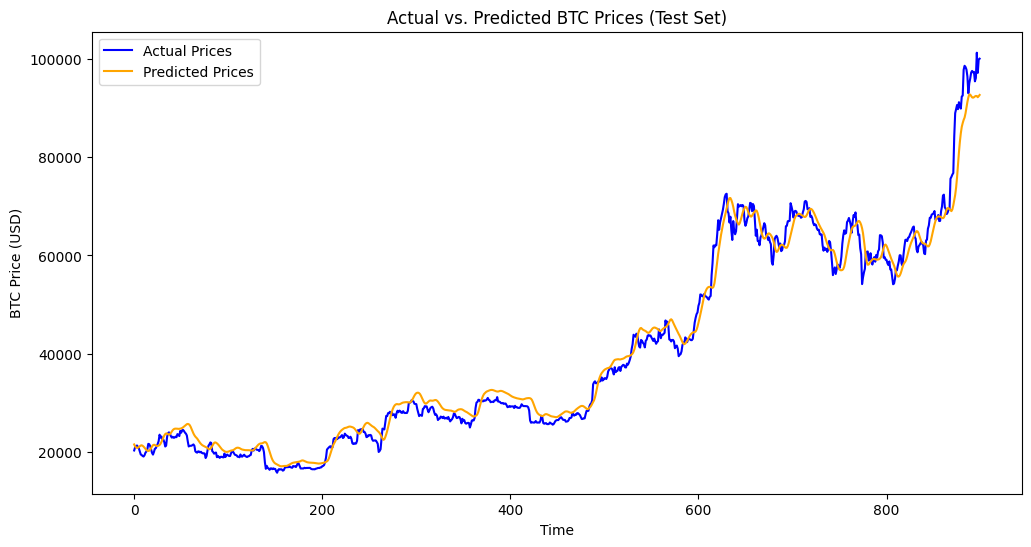

In [7]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices for the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Prices", color='blue')
plt.plot(y_pred_rescaled, label="Predicted Prices", color='orange')
plt.title("Actual vs. Predicted BTC Prices (Test Set)")
plt.xlabel("Time")
plt.ylabel("BTC Price (USD)")
plt.legend()
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


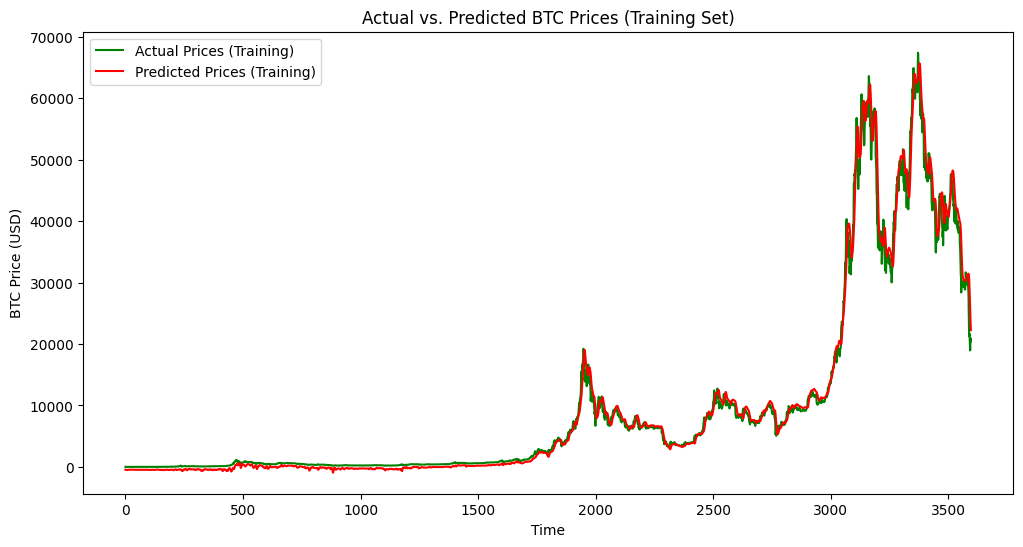

In [8]:
# Predict on the training set
y_train_pred = model.predict(X_train)
y_train_rescaled = target_scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_train_pred_rescaled = target_scaler.inverse_transform(y_train_pred).flatten()

# Plot training set predictions
plt.figure(figsize=(12, 6))
plt.plot(y_train_rescaled, label="Actual Prices (Training)", color='green')
plt.plot(y_train_pred_rescaled, label="Predicted Prices (Training)", color='red')
plt.title("Actual vs. Predicted BTC Prices (Training Set)")
plt.xlabel("Time")
plt.ylabel("BTC Price (USD)")
plt.legend()
plt.show()


**Let's now create a simpler LSTM model**

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# Load the historical BTC data
data = pd.read_csv("btcusd_1-min_data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Timestamp', inplace=True)

# Resample to daily data
data_daily = data.resample('D').mean()

# Drop rows with NaN values
data_daily.dropna(inplace=True)

# Define the single feature and target
feature = 'Close'
target = 'Close'

# Scale the feature and target
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_daily[[feature]])

# Save the scaler for future use
joblib.dump(scaler, "close_scaler.pkl")

# Prepare sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])  # Sequence of past values
        y.append(data[i + sequence_length])   # Target value
    return np.array(X), np.array(y)

# Sequence length for LSTM
sequence_length = 30  # Use past 30 days for prediction
X, y = create_sequences(data_scaled, sequence_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Ensure correct shape for LSTM input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Dropout to prevent overfitting
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train, 
    epochs=50, batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Inverse transform only the target values
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_rescaled = scaler.inverse_transform(y_pred).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# Save the trained model
model.save("lstm_btc_close_model.h5")
print("LSTM model has been trained and saved as 'lstm_btc_close_model.h5'.")


Epoch 1/50


c:\Users\alex_\miniconda3\envs\deep_learning\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.0580e-04 - val_loss: 0.0017
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4176e-04 - val_loss: 0.0016
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.5113e-04 - val_loss: 6.6788e-04
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.5572e-04 - val_loss: 8.1692e-04
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4.1237e-04 - val_loss: 7.8394e-04
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.7559e-04 - val_loss: 7.5820e-04
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.8041e-04 - val_loss: 5.2183e-04
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.8054e-04 - val_loss: 0.0021
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.0524e-04 - val_loss: 5.2804e-04
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.2065e-04 - val_l

Mean Squared Error (MSE): 2300274.8232232346
Root Mean Squared Error (RMSE): 1516.6656926373837
Mean Absolute Error (MAE): 1037.62873557137
R² Score: 0.9944580617211003
LSTM model has been trained and saved as 'lstm_btc_close_model.h5'.


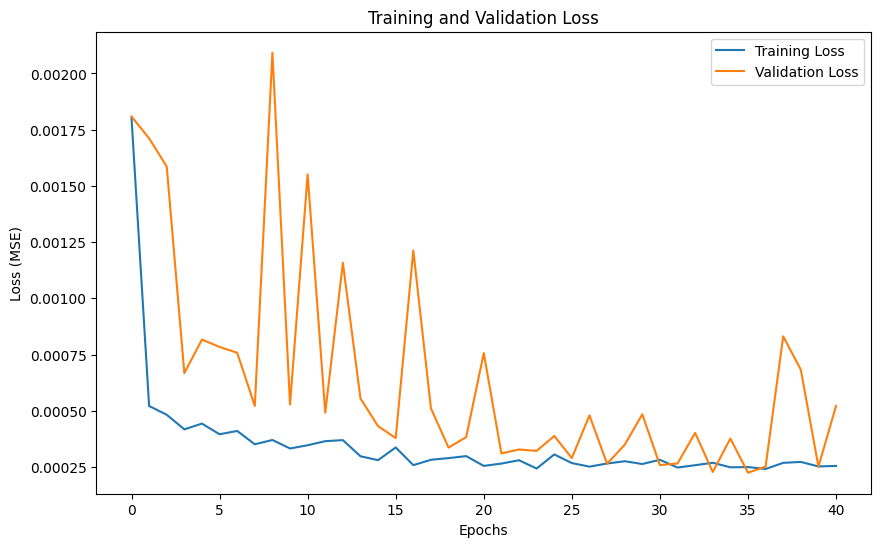

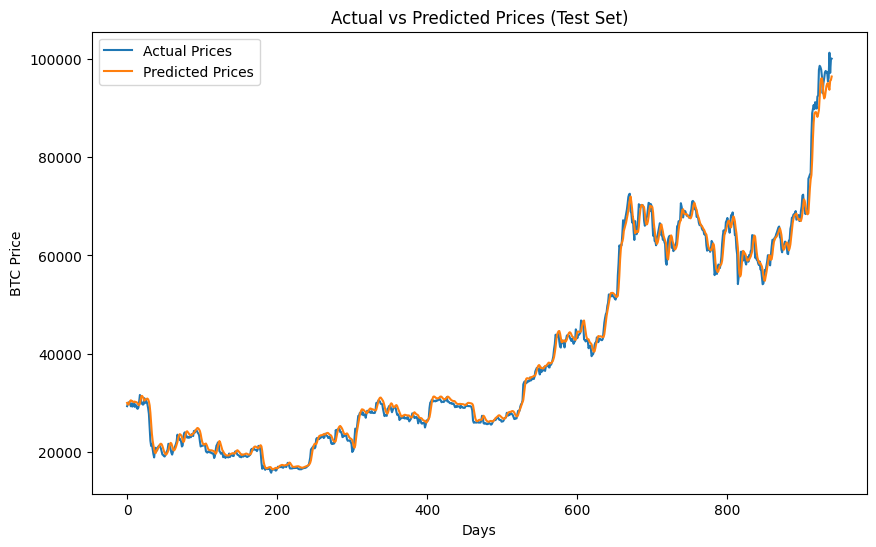

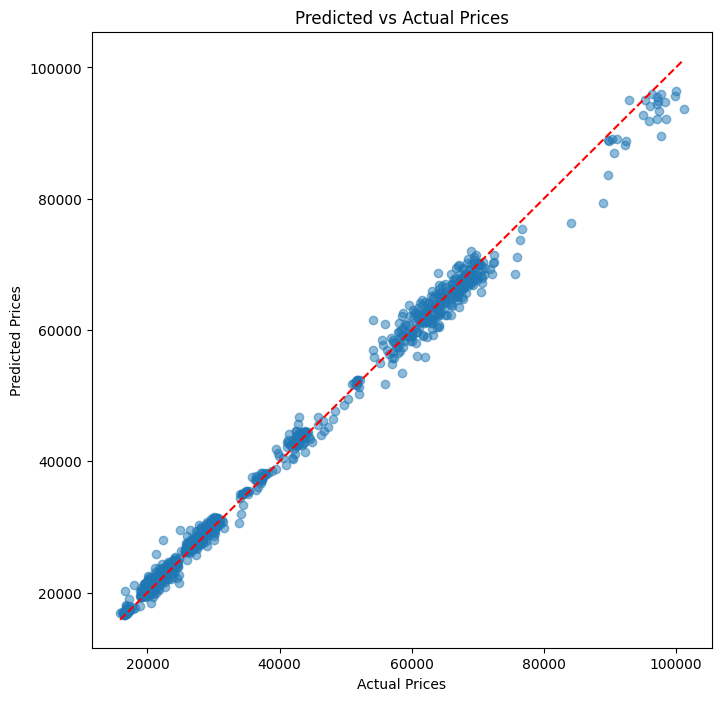

In [29]:
import matplotlib.pyplot as plt

# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot predicted vs. actual prices for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Prices')
plt.plot(y_pred_rescaled, label='Predicted Prices')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.xlabel('Days')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

# Scatter plot of predicted vs actual prices
plt.figure(figsize=(8, 8))
plt.scatter(y_test_rescaled, y_pred_rescaled, alpha=0.5)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], color='red', linestyle='--')  # Diagonal line
plt.show()
